In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/raw_data/StudentsPerformance.csv')

In [15]:
data.info('/content/raw_data/StudentsPerformance.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# find the null values
null_counts = data.isnull().sum()
print(null_counts)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [5]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score'])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score'],
      dtype='object')

In [7]:
data['average score'] = np.round(data['average score'], 2)

In [8]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


In [9]:
#Save the data into Clean data folder
data.to_csv("/content/clean_data/CleanData_Student_Performance.csv")

# **Data Visualation**

### **1. Bar Plot of Race or Ethnicity with count at the top**

<ipython-input-41-694bb6b481a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='race/ethnicity', data=data, palette=custom_palette)


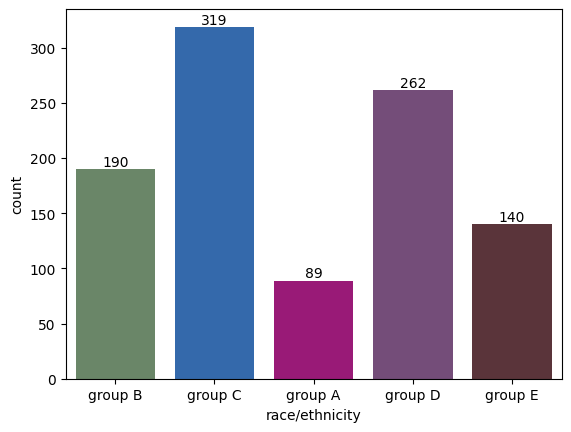

In [41]:
custom_palette = ["#658b63", "#2067bf", "#ae0581", "#794680", "#602e36"]
ax = sns.countplot(x='race/ethnicity', data=data, palette=custom_palette)

#Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 5),
                 textcoords = 'offset points')

plt.savefig('/content/result_snapshots/Race_Ethnicity_Count_SNS_plot.jpg')
plt.show()

### **2. Bar Plot of Gender Distribution with count at the top**

<ipython-input-38-119e1a80c1db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=data, palette=custom_palette)#Add count labels on top of each bar


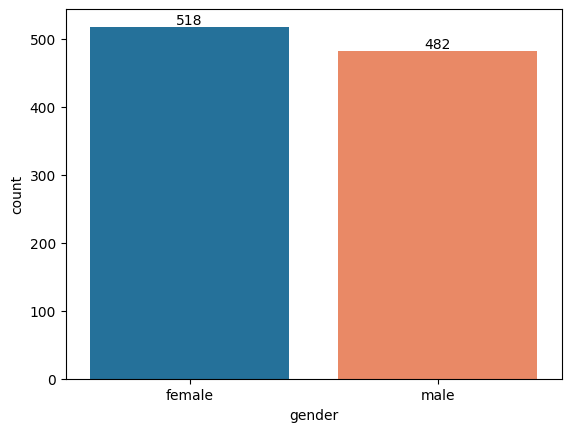

In [38]:
custom_palette = ["#1177ad", "#ff7f50"]
ax = sns.countplot(x='gender', data=data, palette=custom_palette)#Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 5),
                 textcoords = 'offset points')
plt.savefig('/content/result_snapshots/Gender_Count_SNS_plot.jpg')
plt.show()

### **3. Scatter Plot of Average Score VS Math, Writing & Reading Score**

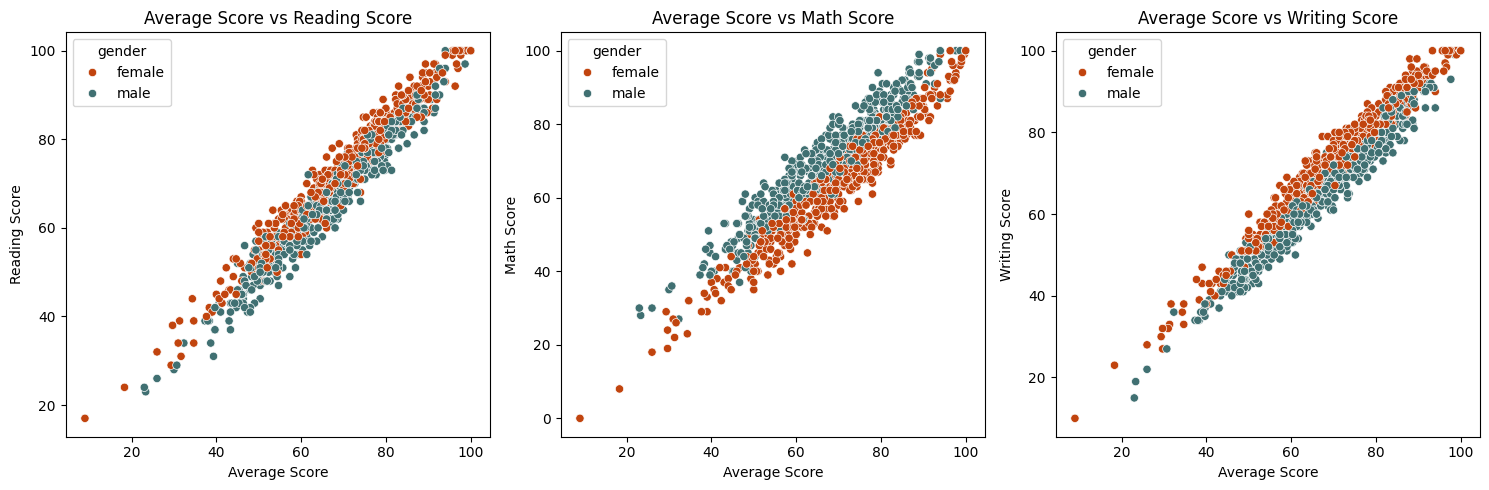

In [36]:
plt.figure(figsize=(15, 5))

# Scatter plot: Average score vs Reading score
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x="average score", y="reading score", hue="gender", palette=["#c1440e", "#407072"])
plt.xlabel("Average Score")
plt.ylabel("Reading Score")
plt.title("Average Score vs Reading Score")

# Scatter plot: Average score vs Math score
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x="average score", y="math score", hue="gender", palette=["#c1440e", "#407072"])
plt.xlabel("Average Score")
plt.ylabel("Math Score")
plt.title("Average Score vs Math Score")

# Scatter plot: Average score vs Writing score
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x="average score", y="writing score", hue="gender", palette=["#c1440e", "#407072"])
plt.xlabel("Average Score")
plt.ylabel("Writing Score")
plt.title("Average Score vs Writing Score")

plt.tight_layout()

plt.savefig('/content/result_snapshots/Avg_vs_RS_MS_WS.jpg')

plt.show()

### **4. Violin Plot of Gender vs Average Score**

<ipython-input-35-49f5e70119da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='average score', data=data, palette=['#5a7d9a', '#a8b79a'])


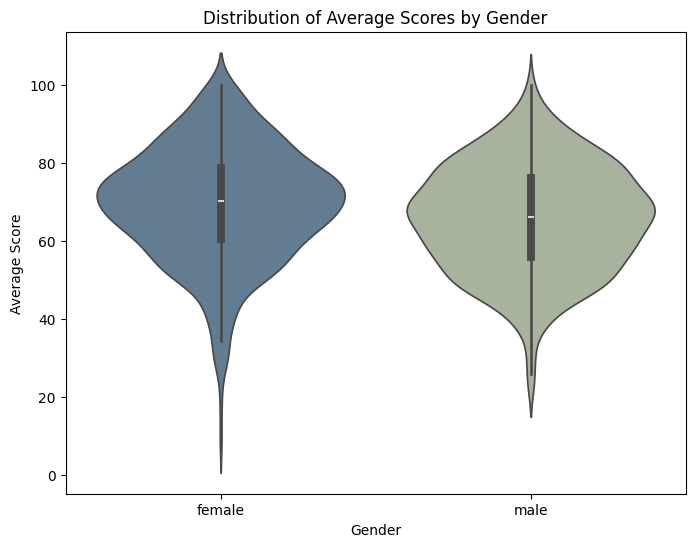

In [35]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='average score', data=data, palette=['#5a7d9a', '#a8b79a'])
plt.title('Distribution of Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

plt.savefig('/content/result_snapshots/Avg_score_by_gender.jpg')
plt.show()

### **5. Pie Graph of Lunch-type**

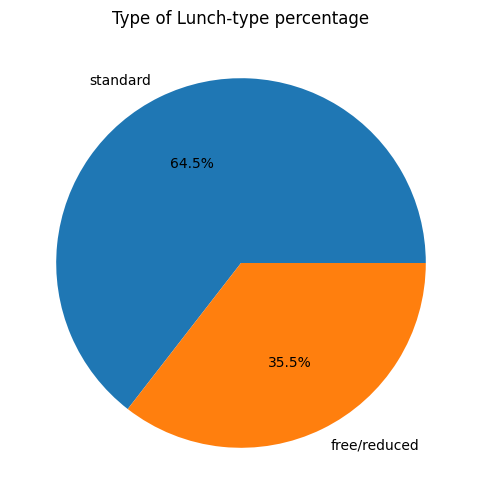

In [57]:
# Count the number of occurrences of each gender
gender_counts = data['lunch'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Type of Lunch-type percentage')
plt.savefig('/content/result_snapshots/Lunch_type_percentage.jpg')

plt.show()

### **6. Test Preparation Course vs Race distribution**

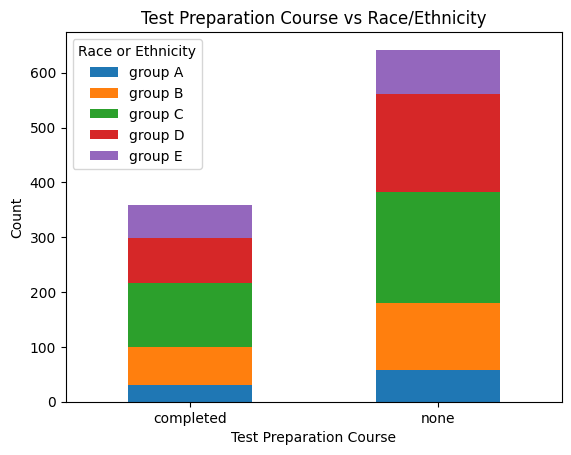

In [52]:
# Grouping data by 'test preparation course' and 'gender' and counting the occurrences
prep_course_gender_counts = data.groupby(['test preparation course', 'race/ethnicity']).size().unstack()

# Plotting
prep_course_gender_counts.plot(kind='bar', stacked=True)
plt.title('Test Preparation Course vs Race/Ethnicity')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Race or Ethnicity')
plt.savefig('/content/result_snapshots/Test_Preparation_VS_Race.jpg')
plt.show()

### **7. Swarm Plot for Parental level of education VS Average Score**

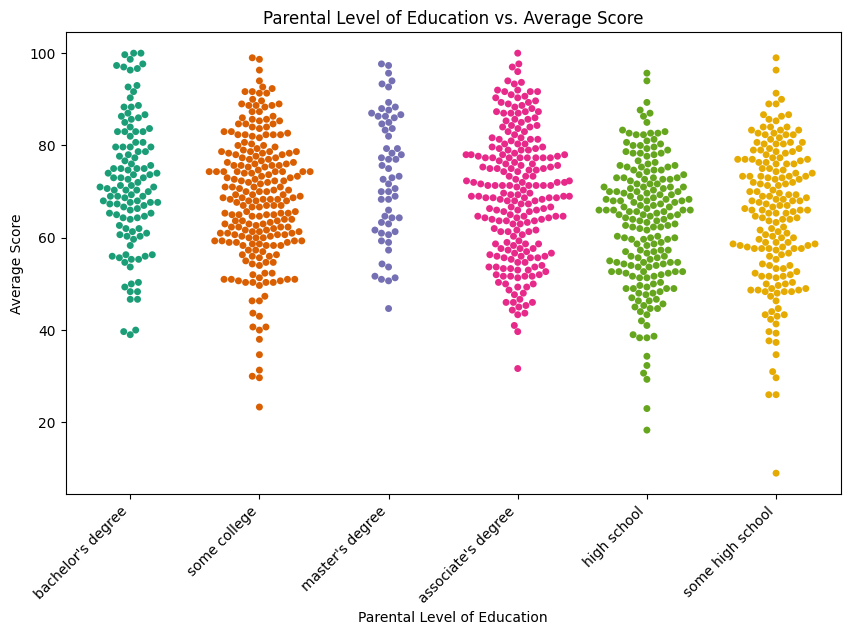

In [64]:
# Plotting
color_palette = []
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='parental level of education', y='average score', hue ='parental level of education', palette = "Dark2")
plt.title('Parental Level of Education vs. Average Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.savefig('/content/result_snapshots/SwarmPlot_PLE_VS_Avg_Score.jpg')
plt.show()